In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import os
%matplotlib inline 

In [2]:
df_users = pd.read_csv('olist_customers_dataset.csv', encoding='windows-1251')
df_users.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_users.customer_unique_id.nunique()

96096

In [4]:
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**1.  Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)**

In [7]:
unique_users_order = df_orders.merge(df_users[['customer_id','customer_unique_id']], on='customer_id')
unique_users_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [8]:
unique_users_order \
    .query('order_status != ["unavailable", "canceled"]') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'count'}) \
    .query('order_id == 1').shape[0]

92102

У нас есть пропущенные значения во времени подтверждения оплаты заказа, но также указана дата доставки, исключим эти значения из общего количества.

In [9]:
unique_users_order.fillna('').query('order_approved_at == "" and order_delivered_customer_date != "" and order_status != ["unavailable", "canceled"]').groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'count'}) \
    .query('order_id == 1').shape[0]

14

Ответ: 92102 - 14 = 92088.

**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)**

In [10]:
df_orders.order_purchase_timestamp = pd.to_datetime(df_orders.order_purchase_timestamp)

In [11]:
df_orders['Year_month'] = df_orders.order_purchase_timestamp.dt.to_period('M')

In [12]:
df_orders \
    .fillna('') \
    .query('order_status == ["unavailable","canceled"] and order_approved_at != ""') \
    .groupby(['Year_month','order_status'], as_index=False) \
    .order_id.count().groupby('order_status',as_index=False).mean()

,order_status,order_id
0,canceled,22
1,unavailable,29


Ответ: В среднем 22 заказов со статусом "Отменен" и 29 со статусом "Недоступен".

**3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)** 

In [13]:
df_orders['Weeks'] = df_orders.order_purchase_timestamp.dt.day_name()

In [14]:
df_products = df_orders.merge(df_items[['order_id','product_id']], on='order_id')

In [15]:
df_product_mean = df_products \
    .groupby(['product_id','Weeks'], as_index=False) \
    .order_id.count() \
    .set_index('Weeks') \
    .groupby('product_id', as_index=False).order_id.idxmax()
df_product_mean.head()

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)**

In [16]:
unique_users_order.order_purchase_timestamp = pd.to_datetime(unique_users_order.order_purchase_timestamp)
unique_users_order['Year_month'] = unique_users_order.order_purchase_timestamp.dt.to_period('M')
unique_users_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [17]:
count_items = unique_users_order \
    .query('order_status == ["delivered", "processing", "shipped"]') \
    .groupby(['customer_unique_id', 'Year_month'], as_index=False) \
    .agg({'order_id':'count'})
count_items['count_weeks'] = count_items.Year_month.dt.daysinmonth/7
count_items.head()

,customer_unique_id,Year_month,order_id,count_weeks
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714


In [18]:
count_items['mean_items'] = count_items.order_id / count_items.count_weeks

In [19]:
count_items.head()

,customer_unique_id,Year_month,order_id,count_weeks,mean_items
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333


Колонка **mean_items** показывает среднее количество покупок в неделю.

**5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. (15 баллов)**

Соединяем необходимые таблица и переводим столбец с датой в необходимый формат

In [20]:
df_items_user = df_orders.merge(df_users[['customer_id','customer_unique_id']], on='customer_id')
df_items_user = df_items_user[['order_id','customer_id','customer_unique_id','order_purchase_timestamp']]
df_items_user['order_purchase_timestamp'] = df_items_user['order_purchase_timestamp'].astype('datetime64[M]')
df_items_user.head()

,order_id,customer_id,customer_unique_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01


Находим самую первую активность пользователей

In [21]:
user_uniq = df_items_user.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp':'min'})
user_uniq.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01


In [22]:
user_uniq.agg(['max','min'])

,customer_unique_id,order_purchase_timestamp
max,ffffd2657e2aad2907e67c3e9daecbeb,2018-10-01
min,0000366f3b9a7992bf8c76cfdf3221e2,2016-09-01


In [23]:
min_date = user_uniq['order_purchase_timestamp'].min()
max_date = user_uniq['order_purchase_timestamp'].max()

Создаем датафрейм с перечислением каждого месяца от минимальной до максимальной даты

In [24]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))
month.columns = ['month']

Сделаем дополнительные колонки - ключи, чтобы потом соединить датафреймы

In [25]:
user_uniq['key'] = 1
month['key'] = 1

In [26]:
template = user_uniq.merge(month, on='key')[['customer_unique_id', 'order_purchase_timestamp', 'month']]
template.head()

,customer_unique_id,order_purchase_timestamp,month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-09-01
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-10-01
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-11-01
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-12-01
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-01-01


Уберем ненужные даты

In [27]:
template = template[template['month'] >= template['order_purchase_timestamp']]

In [28]:
template.head()

,customer_unique_id,order_purchase_timestamp,month
20,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
21,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01
22,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01
23,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
24,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01


Посчитаем кол-во покупок в каждый месяц

In [29]:
users_month = df_items_user.groupby(['customer_unique_id','order_purchase_timestamp'])['order_id'].count().reset_index()
users_month.columns = ['customer_unique_id', 'month', 'count']
users_month

,customer_unique_id,month,count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
98043,ffff371b4d645b6ecea244b27531430a,2017-02-01,1
98044,ffff5962728ec6157033ef9805bacc48,2018-05-01,1


In [30]:
report = template.merge(users_month, on=['customer_unique_id', 'month'],how='left')
report.head()

,customer_unique_id,order_purchase_timestamp,month,count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN


In [31]:
report['active'] = (report['count'] > 0)*1

In [32]:
report.head()

,customer_unique_id,order_purchase_timestamp,month,count,active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0,1
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0


Сделаем сводную таблицу

In [33]:
report.pivot_table(index='order_purchase_timestamp',columns='month',values='active',aggfunc='mean')*100

month,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,...,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-01,NaN,100.0,0.0,0.0,0.0,0.00000,0.000000,0.311526,0.000000,0.000000,...,0.311526,0.000000,0.311526,0.000000,0.623053,0.623053,0.000000,0.000000,0.000000,0.000000
2016-12-01,NaN,NaN,NaN,100.0,100.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-01,NaN,NaN,NaN,NaN,100.0,0.39267,0.261780,0.130890,0.392670,0.130890,...,0.785340,0.392670,0.130890,0.130890,0.261780,0.392670,0.000000,0.130890,0.000000,0.000000
2017-02-01,NaN,NaN,NaN,NaN,NaN,100.00000,0.228311,0.285388,0.114155,0.399543,...,0.285388,0.171233,0.171233,0.114155,0.057078,0.057078,0.228311,0.000000,0.000000,0.000000
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.493171,0.379363,0.379363,...,0.379363,0.151745,0.227618,0.113809,0.151745,0.227618,0.075873,0.151745,0.000000,0.000000
2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.595238,0.212585,...,0.170068,0.255102,0.085034,0.085034,0.042517,0.085034,0.085034,0.212585,0.000000,0.000000
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.500556,...,0.250278,0.305895,0.250278,0.333704,0.250278,0.027809,0.194661,0.250278,0.000000,0.000000
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,...,0.223001,0.127429,0.223001,0.318573,0.350430,0.159286,0.127429,0.191144,0.000000,0.000000


In [34]:
retention = report.pivot_table(index='order_purchase_timestamp',columns='month',values='active',aggfunc='mean')

Посмотрим на heatmap, ужаснулись

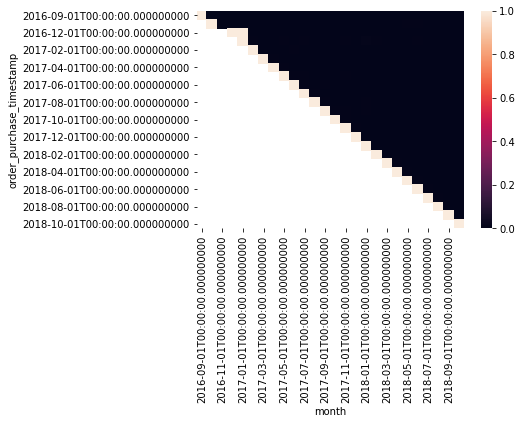

In [35]:
sns.heatmap(retention)

Посмотрим на каждый год отдельно

In [36]:
retention_2017 = report[report['order_purchase_timestamp'] >= '2017-01-01'] 
retention_2017 = retention_2017[retention_2017['order_purchase_timestamp'] <= '2017-12-01']
retention_2017 = retention_2017[retention_2017['month'] >= '2017-01-01'] 
retention_2017 = retention_2017[retention_2017['month'] <= '2017-12-01']
retention_2017 = retention_2017.pivot_table(index='order_purchase_timestamp',columns='month',values='active',aggfunc='mean') * 100
retention_2017

month,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
order_purchase_timestamp,,,,,,,,,,,,
2017-01-01,100.0,0.39267,0.261780,0.130890,0.392670,0.130890,0.523560,0.130890,0.130890,0.000000,0.392670,0.130890
2017-02-01,NaN,100.00000,0.228311,0.285388,0.114155,0.399543,0.114155,0.228311,0.171233,0.171233,0.228311,0.114155
2017-03-01,NaN,NaN,100.000000,0.493171,0.379363,0.379363,0.341426,0.151745,0.151745,0.303490,0.341426,0.075873
2017-04-01,NaN,NaN,NaN,100.000000,0.595238,0.212585,0.170068,0.340136,0.255102,0.340136,0.297619,0.297619
2017-05-01,NaN,NaN,NaN,NaN,100.000000,0.500556,0.500556,0.389321,0.305895,0.333704,0.417130,0.166852
2017-06-01,NaN,NaN,NaN,NaN,NaN,100.000000,0.477859,0.350430,0.414145,0.254858,0.382287,0.382287
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.513611,0.359527,0.256805,0.282486,0.205444
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.693117,0.334608,0.262906,0.358509
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.677966,0.532688,0.290557


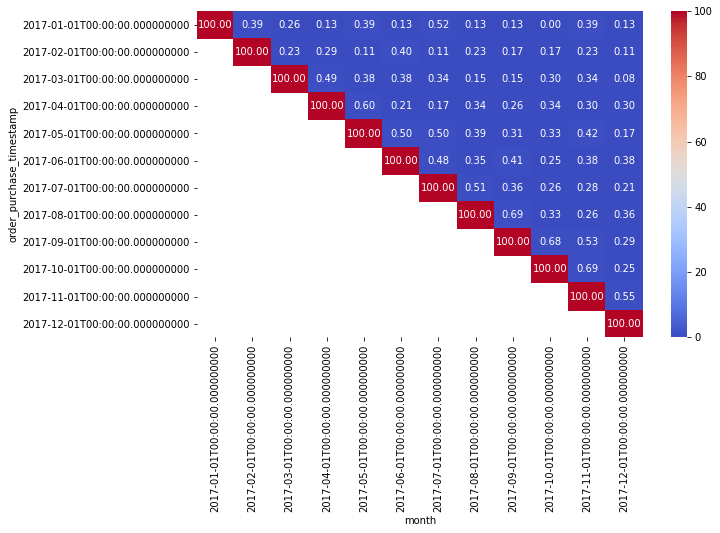

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(retention_2017, annot=True, cmap='coolwarm', fmt='.2f')

In [38]:
retention_2018 = report[report['order_purchase_timestamp'] >= '2018-01-01'] 
retention_2018 = retention_2018[retention_2018['order_purchase_timestamp'] <= '2018-12-01']
retention_2018 = retention_2018[retention_2018['month'] >= '2018-01-01'] 
retention_2018 = retention_2018[retention_2018['month'] <= '2018-12-01']
retention_2018 = retention_2018.pivot_table(index='order_purchase_timestamp',columns='month',values='active',aggfunc='mean') * 100
retention_2018

month,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01
order_purchase_timestamp,,,,,,,,,,
2018-01-01,100.0,0.341637,0.384342,0.284698,0.284698,0.156584,0.170819,0.227758,0.000000,0.000000
2018-02-01,NaN,100.000000,0.387537,0.387537,0.294528,0.263525,0.217021,0.201519,0.000000,0.000000
2018-03-01,NaN,NaN,100.000000,0.459440,0.315865,0.287150,0.129218,0.129218,0.000000,0.000000
2018-04-01,NaN,NaN,NaN,100.000000,0.581135,0.312919,0.238415,0.134108,0.000000,0.000000
2018-05-01,NaN,NaN,NaN,NaN,100.000000,0.528541,0.271821,0.211416,0.000000,0.000000
2018-06-01,NaN,NaN,NaN,NaN,NaN,100.000000,0.420875,0.286195,0.000000,0.016835
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.724757,0.032944,0.000000
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.111625,0.031893
2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.000000


Итого самый высокий retention на 3й месяц: **2017-09**

**6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.**

In [39]:
df_RFM = df_orders \
    .merge(df_users, on='customer_id') \
    .merge(df_items, on='order_id')[['order_purchase_timestamp', 'customer_unique_id', 'order_id', 'price']]
df_RFM.head()

,order_purchase_timestamp,customer_unique_id,order_id,price
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90


Т.к. нам нужен RFM, сгрупируем сразу по уникальным пользователям и найдем сумму, которую тратит пользователь, кол-во покупок и дату последней покупки

In [40]:
df_RFM = df_RFM \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'price':'sum', 'order_id':'count', 'order_purchase_timestamp':'max'})

In [41]:
df_RFM['price'].describe()

count    95420.000000
mean       142.440198
std        217.656355
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: price, dtype: float64

Найдем самую раннюю дату, от которой мы будем отталкиваться в подсчёте последней даты покупки

In [42]:
max_day = df_RFM['order_purchase_timestamp'].max()

In [43]:
df_RFM['delta_day'] = max_day - df_RFM['order_purchase_timestamp']

Поделим длительность с последней покупки на 5 групп

In [44]:
R = df_RFM['delta_day'].quantile(q=[0.2,0.4,0.6,0.8])

In [45]:
def r_score(n, R):
    if n <= R[0.2]:
        return 5
    elif n <= R[0.4]:
        return 4
    elif n <= R[0.6]:
        return 3
    elif n <= R[0.8]:
        return 2
    else:
        return 1

In [46]:
df_RFM['R'] = df_RFM['delta_day'].apply(lambda x: r_score(x, R))

Ужаснемся describe() и поймем, что пятью частями тут не совсем корректно будет, поэтому разделил на 3 части

In [47]:
df_RFM.order_id.describe()

count    95420.00000
mean         1.18057
std          0.62145
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         24.00000
Name: order_id, dtype: float64

In [48]:
df_RFM[df_RFM['order_id'] > 2]

,customer_unique_id,price,order_id,order_purchase_timestamp,delta_day,R
22,000fbf0473c10fc1ab6f8d2d286ce20c,285.80,4,2018-07-26 09:43:52,38 days 23:23:05,5
157,0064a1b5f5cddd047c987b988a90c8c1,215.60,4,2018-03-02 08:33:32,185 days 00:33:25,3
201,0085139b503668b3addcfe826d91be8d,465.88,3,2018-01-30 13:48:42,215 days 19:18:15,3
224,0096c18412349537abc45e350581cbbc,679.60,4,2017-03-14 17:33:28,537 days 15:33:29,1
229,0097fca0db567f5ca79509b7b4fc1c2d,172.14,7,2018-04-19 11:17:55,136 days 21:49:02,4
...,...,...,...,...,...,...
95288,ff9ff869636c26565ded16038be5fa7d,269.70,3,2017-05-20 16:42:07,470 days 16:24:50,1
95322,ffbb6557e45f7158781514f0efddb0d5,91.60,4,2017-11-24 00:48:08,283 days 08:18:49,2
95384,ffe780a8995715d9560ca10f3351710f,89.70,3,2017-08-10 12:44:46,388 days 20:22:11,1
95403,fff22793223fe80c97a8fd02ac5c6295,66.00,3,2018-06-26 11:01:47,68 days 22:05:10,5


In [49]:
def f_score(n):
    if n <= 1:
        return 1
    elif n <=  2:
        return 2
    else:
        return 3

In [50]:
df_RFM['F'] = df_RFM['order_id'].apply(lambda x: f_score(x))

In [51]:
df_RFM.price.describe()

count    95420.000000
mean       142.440198
std        217.656355
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: price, dtype: float64

In [52]:
M = df_RFM.price.quantile([0.2,0.4,0.6,0.8])

In [53]:
def m_score(n, M):
    if n >= M[0.8]:
        return 5
    elif n >= M[0.6]:
        return 4
    elif n >= M[0.4]:
        return 3
    elif n >= M[0.2]:
        return 2
    else:
        return 1

In [54]:
df_RFM['M'] = df_RFM['price'].apply(lambda x: m_score(x, M))

In [55]:
df_RFM['RFM'] = df_RFM['R']*100 + df_RFM['F']*10 + df_RFM['M']

In [56]:
df_RFM.head()

,customer_unique_id,price,order_id,order_purchase_timestamp,delta_day,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-10 10:56:27,115 days 22:10:30,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-07 11:11:27,118 days 21:55:30,4,1,1,411
2,0000f46a3911fa3c0805444483337064,69.00,1,2017-03-10 21:05:03,541 days 12:01:54,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-10-12 20:29:41,325 days 12:37:16,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-14 19:45:42,292 days 13:21:15,2,1,5,215
